#**Introduction to Hypothesis Testing**

Previously you learned how to use Python libraries and custom functions for constructing probability matrices and confusion matrices. For our final lab, we will extend your statistical repetoire to include different kinds of hypothesis testing to enable the identification of statistically significant differences within your data.

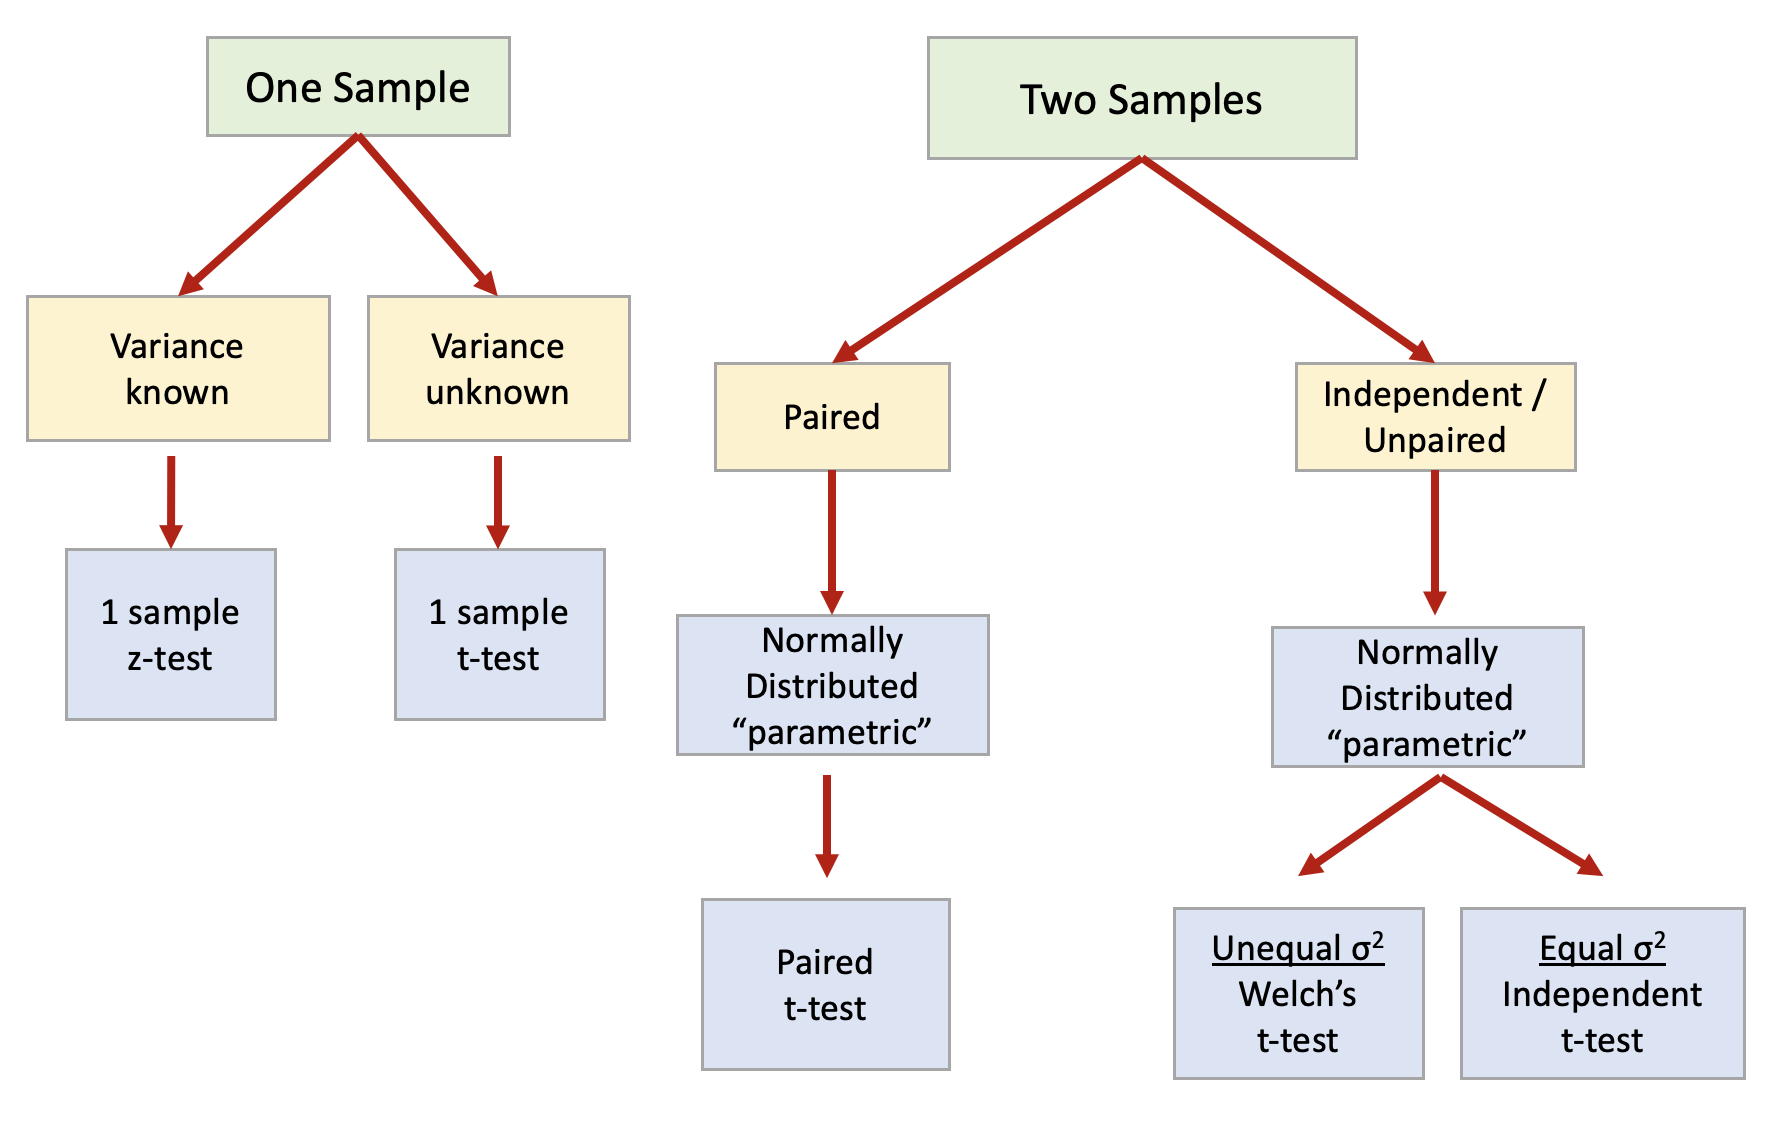

#**Getting Started**

To start, we will import cleaned data from the Digitalis Investigation Group (DIG) Trial.

In [2]:
import pandas as pd
df = pd.read_csv('https://drive.google.com/uc?export=download&id=1L4aScG_IYBOnCCgtjJ1yLKUhi6n68YGP')

Recall that it has the following structure:

In [3]:
df.head()

,AGE,RACE,SEX,EJF_PER,CREAT,KLEVEL,CHFDUR,CHFETIOL,PREVMI,DIABETES,HYPERTEN,DIGDOSE,CVD,WHF,DIG,HOSP,NHOSP,DEATH,REASON,DIABETES_AND_HYPERTEN
0,77,1,1,12,1.500,3.1,2.0,4.0,1.0,0,1.0,0.25,1,1,0,1,4,1,1.0,0
1,72,1,2,36,1.239,5.1,12.0,1.0,0.0,0,1.0,0.25,1,1,0,1,2,0,Not given,0
2,74,1,1,15,1.466,4.0,288.0,4.0,0.0,0,0.0,0.375,1,1,0,1,5,0,Not given,0
3,69,2,2,45,1.200,4.3,84.0,4.0,1.0,0,0.0,0.25,1,0,0,1,5,0,Not given,0
4,64,1,2,30,1.300,4.3,31.0,1.0,1.0,0,0.0,0.25,0,0,0,0,0,1,2.0,0


#**Terminology**


***Population***: the entire pool of all subjects of interest. A population has parameters.

***Sample***: a subset of a population. A sample has statistics, used to estimate the parameters.

***Sampling***: the process of selecting a sample from a population

The first step of hypothesis testing is to form the null and alternative hypothesis. The **null hypothesis** (H0) is always that there is no statistically significant difference between specified populations; the **alternative hypothesis** (H1) is that there is a statistically significant difference. For one-sample and two-sample tests of means, there are two forms this can take: a two-sided and a one-sided test.

Next, a hypothesis test is performed to verify whether the null can be rejected in favor of the alternative hypothesis.


#**Testing Assumptions**

Before we use hypothesis tests, we must first know what assumptions they make beforehand. For example, a hypothesis test that assumes data was randomly sampled from a population that approximately follows a normal distribution should not be used when it is known the population follows a bimodal distribution. These types of hypothesis tests that make assumptions about how the population is distributed are known as parametric tests. Conversely, hypothesis tests that do not make assumptions about the population distribution are known as nonparametric tests.

To test these assumptions about normality and variance, we will use special hypothesis tests specifically made for these purposes. For these and most other hypothesis tests, we will use the `stats` sub-package of the `scipy` library, referenced as `scipy.stats`.

In [4]:
import scipy.stats as stats

##**The one-sample Kolmogorov–Smirnov test (using a normal distribution) (n >= 50)**

$$ H_0: The\ data\ follows\ the\ chosen\ distribution\ (normal) $$
$$ H_1: The\ data\ does\ not\ follow\ the\ chosen\ distribution\ (normal) $$

In [5]:
stats.kstest(df['AGE'], 'norm')

KstestResult(statistic=1.0, pvalue=0.0, statistic_location=21, statistic_sign=-1)

##**The Shapiro-Wilks test for normality (n < 50)**

$$ H_0: The\ data\ comes\ from\ a\ normally\ distributed\ population $$
$$ H_1: The\ data\ comes\ from\ a\ non-normally\ distributed\ population $$

In [6]:
subsample = df.sample(n=20)['AGE']
stats.shapiro(subsample)

ShapiroResult(statistic=0.9105956554412842, pvalue=0.06542342901229858)

##**The Levene Test for equality of variances**

$$ H_0: The\ variance\ among\ groups\ is\ equal $$
$$ H_1: The\ variance\ among\ groups\ is\ not\ equal\ for\ at\ least\ one\ pair $$

In [7]:
worsening = df.loc[df['WHF'] == 1]
notWorsening = df.loc[df['WHF'] == 0]

stats.levene(worsening['NHOSP'], notWorsening['NHOSP'])

LeveneResult(statistic=560.6739741925343, pvalue=1.4755984977110412e-118)

#**One Sample Tests about Means**

##**One-sample Z-Test**


***Two-sided:***

$$ H_0: x̄ = populationMean $$
$$ H_1: x̄ ≠ populationMean $$

***One-sided examples:***

$$ H_0: x̄ \le populationMean $$
$$ H_1: x̄ > populationMean $$

$$or$$

$$ H_0: x̄ \ge populationMean $$
$$ H_1: x̄ < populationMean $$

**Assumptions:**

*   The population standard deviation is known.
*   The data is continuous.
*   The data is a simple random sample from the population of interest.
*   The data in the population is approximately normally distributed.




In [8]:
def oneSampleZTestForMeans(sample, popMean, popStdDev):
  """
  Peform a one-sample z-test for means to compare a sample mean (x̄) to
  a known population mean mu (μ) when the population standard deviation sigma (σ)
  is known. Then, print the z-score with p-values for one-sided and two-sided tests.

  This test assumes the variable in question is continuous
  and it is either normally distributed or its sample size is at least 30.

  Arguments:
    ・sample (list or Pandas Series): The list of values
    ・mu (int or float): The known population mean
    ・sigma (int or float): The known population standard deviation
  """
  import numpy as np
  import scipy.stats as stats

  sampleMean = np.mean(sample)
  sampleSize = len(sample)

  # Calculate the z-score.
  stdDevOfSamplingDistribution = popStdDev/np.sqrt(sampleSize)
  zScore = (sampleMean - popMean)/ stdDevOfSamplingDistribution

  # Calculate the p-values.
  oneSidedPValue = stats.norm.sf(abs(zScore))
  twoSidedPValue = oneSidedPValue*2

  results = ( f'z-score = {zScore}\n'
              f'one-sided p-value = {oneSidedPValue}\n'
              f'two-sided p-value = {twoSidedPValue}'
            )

  print(results)

In [9]:
populationMean = 28.5
populationStdDev = 5.0
oneSampleZTestForMeans(df['EJF_PER'], populationMean, populationStdDev)

z-score = -0.06333794997025377
one-sided p-value = 0.4747486983544891
two-sided p-value = 0.9494973967089781


##**One-sample T-Test**


***Two-sided:***

$$ H_0: μ = populationMean $$
$$ H_1: μ ≠ populationMean $$

***One-sided examples:***

$$ H_0: μ \ge populationMean $$
$$ H_1: μ < populationMean $$

$$or$$

$$ H_0: μ \le populationMean $$
$$ H_1: μ > populationMean $$

**Assumptions:**

*   The data is continuous.
*   The data is a simple random sample from the population of interest.
*   The data in the population is approximately normally distributed.




Two-sided version:

In [10]:
populationMean = 4.5
stats.ttest_1samp(df['KLEVEL'], populationMean, alternative = 'two-sided')

TtestResult(statistic=-1.4207590796573104, pvalue=0.1554389141411458, df=5984)

One-sided versions:

In [11]:
populationMean = 4.5
stats.ttest_1samp(df['KLEVEL'], populationMean, alternative = 'less')

TtestResult(statistic=-1.4207590796573104, pvalue=0.0777194570705729, df=5984)

In [12]:
populationMean = 4.5
stats.ttest_1samp(df['KLEVEL'], populationMean, alternative = 'greater')

TtestResult(statistic=-1.4207590796573104, pvalue=0.9222805429294271, df=5984)

#**Two Sample Tests about Means**

##**Paired T-test**

**Assumptions:**

*   The dependent variable is continuous.
*   The paired data is a simple random sample from the population of interest.
*   The differences between the two dependent variables follows an approximately normal distribution.


***Two-sided:***

$$ H_0: μ_d = 0 $$
$$ H_1: μ_d ≠ 0 $$

***One-sided examples:***

$$ H_0: μ_d = 0 $$
$$ H_1: μ_d < 0 $$


$$or$$

$$ H_0: μ_d = 0 $$
$$ H_1: μ_d > 0 $$


In [13]:
# Input the data - CARS score for ASD patients before and after Vitamin D treatment
data = {'Before': [40.41, 40.62, 38.94, 41.58, 36.73, 35.13, 37.46, 37.15, 36.51, 35.58],
'After' : [29.26, 30.91, 24.78, 33.36, 31.67, 30.41, 31.31, 28.29, 31.99, 34.48] }
paired_df = pd.DataFrame(data)

In [14]:
stats.ttest_rel(paired_df['After'],paired_df['Before'])

TtestResult(statistic=-6.125863168297284, pvalue=0.00017371447456607835, df=9)

##**Standard Independent T-test**

**Assumptions:**

*   The dependent variable is continuous.
*   Observations are sampled independently from each other.
*   All observations a simple random samples from their populations.
*   Observations in the two groups have an approximately normal distribution.
*   Variances are **equal** between equal between the samples' populations.


***Two-sided:***

$$ H_0: μ_1 = u_2 $$
$$ H_1: μ ≠ u_2 $$

***One-sided examples:***

$$ H_0: μ_1 = u_2 $$
$$ H_1: μ_1 < u_2 $$

$$or$$

$$ H_0: μ_1 = u_2 $$
$$ H_1: μ_1 > u_2 $$

<Axes: xlabel='WHF', ylabel='NHOSP'>

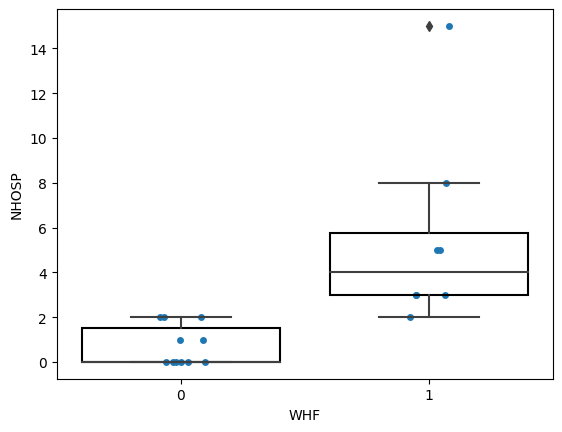

In [15]:
import seaborn as sns

overEightyEight = df.loc[df['AGE'] >= 88]

# Plot a box plot to explore potentially significant differences.
sns.boxplot(data = overEightyEight, x='WHF', y='NHOSP',
            boxprops={'edgecolor':'black','facecolor':(1,1,1,0)}, zorder=5)
sns.stripplot(data = overEightyEight, x='WHF', y='NHOSP', zorder=0)

In [16]:
worsening = overEightyEight.loc[overEightyEight['WHF'] == 1]
notWorsening = overEightyEight.loc[overEightyEight['WHF'] == 0]

stats.levene(worsening['NHOSP'], notWorsening['NHOSP'])

LeveneResult(statistic=3.438724175796113, pvalue=0.08111589879791437)

In [17]:
stats.ttest_ind(worsening['NHOSP'].dropna(), notWorsening['NHOSP'].dropna(), alternative = 'greater', equal_var=True)

TtestResult(statistic=3.6290758926656523, pvalue=0.0010369006672470398, df=17.0)

##**Welch's T-test**

**Assumptions:**

*   The dependent variable is continuous.
*   Observations are sampled independently from each other.
*   All observations a simple random samples from their populations.
*   Observations in the two groups have an approximately normal distribution.
*   Variances are **not** equal between the samples' populations.


***Two-sided:***

$$ H_0: μ_1 = u_2 $$
$$ H_1: μ ≠ u_2 $$

***One-sided examples:***

$$ H_0: μ_1 = u_2 $$
$$ H_1: μ_1 < u_2 $$

$$or$$

$$ H_0: μ_1 = u_2 $$
$$ H_1: μ_1 > u_2 $$

<Axes: xlabel='WHF', ylabel='NHOSP'>

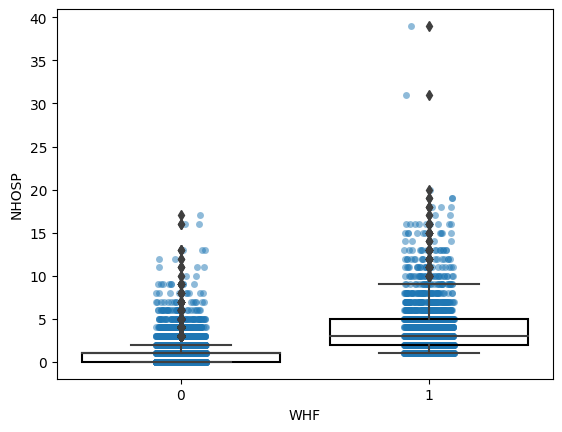

In [18]:
import seaborn as sns

# Plot a box plot to explore potentially significant differences.
sns.boxplot(data = df, x='WHF', y='NHOSP', boxprops={'edgecolor':'black','facecolor':(1,1,1,0)}, zorder=5)
sns.stripplot(data = df, x='WHF', y='NHOSP', alpha=.5, zorder=0)

In [19]:
worsening = df.loc[df['WHF'] == 1]
notWorsening = df.loc[df['WHF'] == 0]

stats.levene(worsening['NHOSP'], notWorsening['NHOSP'])

LeveneResult(statistic=560.6739741925343, pvalue=1.4755984977110412e-118)

In [20]:
stats.ttest_ind(worsening['NHOSP'].dropna(), notWorsening['NHOSP'].dropna(), alternative = 'greater', equal_var=False)

TtestResult(statistic=37.71682482783439, pvalue=9.730287255031451e-242, df=2239.1845708941864)

# **Hands-on Assignment 9: Hypothesis Testing**

##**Introduction**
Here you will gain experience applying hypothesis tests to uncover statistical significance.

The data you will be using a dataset published by The National Heart, Lung and Blood Institute (NHLBI) from a clinical trial known as the Digitalis Investigation Group (DIG) Trial. This data contains baseline and outcome information for chronic heart failure patients from the DIG Trial cohort who received either the drug Digoxin or a placebo. Here, outcomes have been recorded under two main categories, cardiovasular mortality and hospitalization.


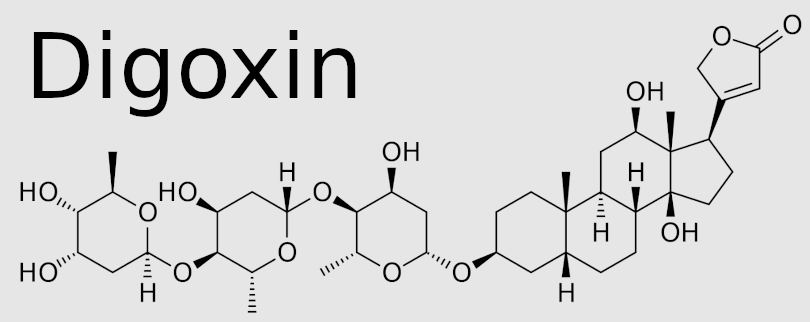

For more information, you may refer to a comprehensive description of this dataset here:

https://biolincc.nhlbi.nih.gov/media/teachingstudies/digdoc.pdf?link_time=2022-09-20_07:24:09.208947

##**Instructions**

In your own Colab notebook, use the concepts presented in the previous sections to perform the hypothesis tests indicated below. You will be graded based on correct execution and interpretation of your hypothesis tests.

##**Steps**

Using the DIG dataset, perform the following hypothesis tests on variables of your choosing. They must be different from the examples in the previous section.

You must state your null and alternative hypotheses, run the hypothesis test, and provide an interpretation of your results. When necessary, you may make up necessary population parameters (ex. mean and standard deviation).

**One-sample Z-Test**

<font color='red'>Type your null and alternative hypotheses here.</font>

In [21]:
"""
Two sided
H0: The mean serum creatinine level of the sample is equal to the known population mean serum creatinine level.
H1: The mean serum creatinine level of the sample is not equal to the known population mean serum creatinine level.
"""

'\nTwo sided\nH0: The mean serum creatinine level of the sample is equal to the known population mean serum creatinine level.\nH1: The mean serum creatinine level of the sample is not equal to the known population mean serum creatinine level.\n'

In [22]:
import pandas as pd
df=pd.read_csv('https://drive.google.com/uc?export=download&id=1M0ZFQ09JPZGPm0cVJ0gXwENSgwf84cd2')

In [23]:
df.head()

,ID,TRTMT,AGE,RACE,SEX,EJF_PER,EJFMETH,CHESTX,BMI,KLEVEL,...,OTH,OTHDAYS,HOSP,HOSPDAYS,NHOSP,DEATH,DEATHDAY,REASON,DWHF,DWHFDAYS
0,1,0,66,1,1,40,2,0.50,20.073,NaN,...,1,533,1,533,6,0,1438,NaN,1,1379
1,2,0,77,1,1,12,1,0.56,20.701,3.1,...,1,880,1,468,4,1,1360,1.0,1,1329
2,3,0,72,1,2,36,1,0.68,25.530,5.1,...,0,1391,1,631,2,0,1391,NaN,1,631
3,4,1,57,1,1,31,1,0.48,25.794,NaN,...,0,1157,0,1157,0,0,1157,NaN,0,1157
4,5,0,74,1,1,15,1,0.53,25.654,4.0,...,1,459,1,191,5,0,1550,NaN,1,191


In [24]:
import numpy as np
import scipy.stats as stats
import seaborn as sns

<Axes: xlabel='CREAT', ylabel='Count'>

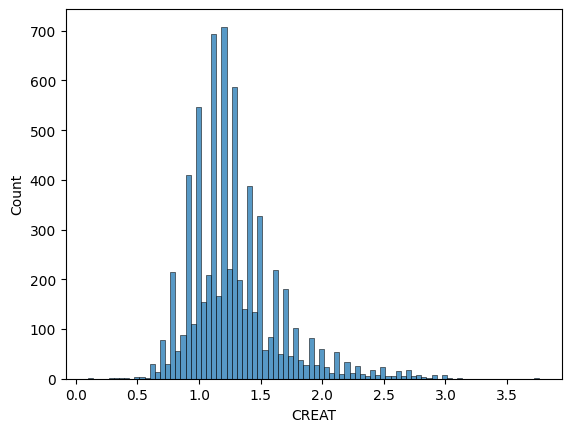

In [25]:
sns.histplot(df['CREAT'])

In [26]:
creat_data = df['CREAT'].dropna()

In [27]:
# Assumed population parameters
population_mean = 1.2
population_std_dev = 0.25

In [29]:
sample_mean = np.mean(creat_data)
sample_size = len(creat_data)
print(f'Sample Mean: {sample_mean}')

Sample Mean: 1.2862760294117646


In [30]:
standard_error = population_std_dev / np.sqrt(sample_size)
z_score = (sample_mean - population_mean) / standard_error
two_sided_p_value = stats.norm.sf(abs(z_score)) * 2
print(f'Z-Score: {z_score}')
print(f'two_sided_P-Value: {two_sided_p_value}')

Z-Score: 28.458014577888108
two_sided_P-Value: 3.878302351098568e-178


<font color='red'>Type your interpretation of the test here.</font>

These data show that the mean serum creatinine level of the sample is statistically signigicantly different to the known population mean serum creatinine level. (p=3.878302351098568e-178)

**One-sample T-Test**

<font color='red'>Type your null and alternative hypotheses here.</font>

In [ ]:
"""
Two-sided
H0:The mean BMI of patients in DIG trial is equal to the average BMI of US population.
H1:The mean BMI of patients in DIG trial is different from the average BMI of US population.
"""

In [ ]:
sns.histplot(df['BMI'])

In [ ]:
bmi_data = df['BMI'].dropna()

In [ ]:
# Assumed population mean ejection fraction percentage
bmi_population_mean = 26.5

In [ ]:
stats.ttest_1samp(bmi_data, bmi_population_mean, alternative = 'two-sided')

<font color='red'>Type your interpretation of the test here.</font>

These data show that the mean BMI of patients in DIG trial is statistically signigicantly different to the average BMI of US population. (p=2.287746101232759e-22)


**Standard Independent T-test (2-samples)**

<font color='red'>Type your null and alternative hypotheses here.</font>

In [ ]:
"""
H0: The mean number of hospitalizations for males is equal to the mean number of hospitalizations for females.
H1: The mean number of hospitalizations for males is statistically signigicantly different to the mean number of hospitalizations for females.
"""

In [ ]:
sns.boxplot(data = df, x='SEX', y='NHOSP',
            boxprops={'edgecolor':'black','facecolor':(1,1,1,0)}, zorder=5)
sns.stripplot(data = df, x='SEX', y='NHOSP', zorder=0)

In [ ]:
nhosp_male = df[df['SEX'] == 1]['NHOSP']
nhosp_female = df[df['SEX'] == 2]['NHOSP']
stats.levene(nhosp_male, nhosp_female)

In [ ]:
stats.ttest_ind(nhosp_male.dropna(), nhosp_female.dropna(), alternative = 'two-sided', equal_var=True)

<font color='red'>Type your interpretation of the test here.</font>

These data show that the difference in the mean number of hospitalizations between male and female groups in DIG trial is not statistically significant. pvalue=0.4463202114684983

**Welch's T-test (2-samples)**

<font color='red'>Type your null and alternative hypotheses here.</font>

In [ ]:
"""
H0: The mean number of hospitalizations for patients with unstable angina is equal to the mean number of hospitalizations for patients without unstable angina .
H1: H0: The mean number of hospitalizations for patients with unstable angina is not equal to the mean number of hospitalizations for patients without unstable angina .
"""

In [ ]:
sns.boxplot(data = df, x='UANG', y='NHOSP', boxprops={'edgecolor':'black','facecolor':(1,1,1,0)}, zorder=5)
sns.stripplot(data = df, x='UANG', y='NHOSP', alpha=.5, zorder=0)

In [ ]:
ANGINA = df.loc[df['UANG'] == 1]
noANGINA = df.loc[df['UANG'] == 0]

stats.levene(ANGINA['NHOSP'], noANGINA['NHOSP'])

In [ ]:
stats.ttest_ind(ANGINA['NHOSP'].dropna(), noANGINA['NHOSP'].dropna(), alternative = 'two-sided', equal_var=False)

<font color='red'>Type your interpretation of the test here.</font>

These data shows that the mean number of hospitalizations for patients with unstable angina is statistically significant different to the mean number of hospitalizations for patients without unstable angina .

-----------

Finally, propose an example of paired data and create a Pandas DataFrame for it.

<font color='red'>Propose an example of paired data here.</font>

In [ ]:
"""
PREVMI (Previous Myocardial Infarction) and MI (Myocardial Infarction)
"""

Then, perform a **Paired T-test**. You must state your null and alternative hypotheses, run the hypothesis test, and provide an interpretation of your results.

<font color='red'>Type your null and alternative hypotheses here.</font>

In [ ]:
"""
H0: Treatment with DIG does not change or increases the rate of Myocardial in patients.
H1: Treatment with DIG decreases the rate of Myocardial in patients.
"""

In [ ]:
df_cleaned = df.dropna(subset=['PREVMI', 'MI'])

In [ ]:
stats.ttest_rel(df_cleaned['PREVMI'], df_cleaned['MI'])

<font color='red'>Type your interpretation of the test here.</font>

These data shoes that treatment with DIG statistically signigicantly decreases the rate of Myocardial in patients.

##**Rubric (10 points)**

**0.5 points per hypothesis test**

The null and alternative hypotheses were stated. For the paired t-test, the data must be paired.

<font color='blue'>Grader comments: None</font>

---

**1 points per hypothesis test**

The hypothesis test was correctly run.

<font color='blue'>Grader comments: None</font>


---
**0.5 point per hypothesis test**

The correct interpretation was provided. For the paired t-test, the data must be paired.

<font color='blue'>Grader comments: None</font>
